<a href="https://colab.research.google.com/github/lisazhao9897/MATH546/blob/master/math546_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import random 
from scipy.stats import foldnorm
from numpy.linalg import inv

#1. Uncorrelated Gaussian 

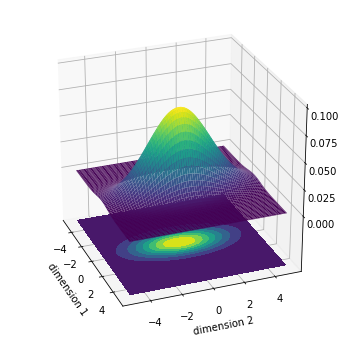

In [0]:
# Our 2-dimensional distribution will be over variables X and Y
N = 200
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
sigma = np.array([[ 1. , 0], [0,  4.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(sigma)
    Sigma_inv = np.linalg.inv(sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.05, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.05,0.1)
ax.set_zticks(np.linspace(0,0.1,5))
ax.view_init(27, -21)
ax.set(xlabel='dimension 1', ylabel='dimension 2')
plt.show()

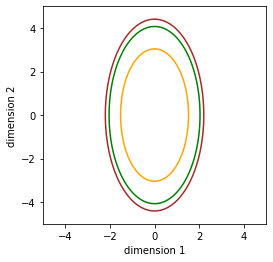

In [0]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.025], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')
plt.show() 

## Normal proposal distribution 

In [0]:
total_steps = 10000 
epsilion1 = np.random.normal(0,1)
epsilion2 = np.random.normal(0,1)
var = multivariate_normal(mu, sigma)

# random initialization of c0 - strictly positive definite 
cov = np.diag([epsilion1, epsilion2])

# random initialization of x0 - initial state 
x = np.random.rand(2)


# burn in 
for t in range(1000): 
  # sample based on cov and mean - last x 
  y = np.random.multivariate_normal(x, cov)                                     # Normal proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y 

print('done burn in') 

# actual testing 
x_holder = [] 
for t in range(total_steps): 
  x_holder.append(x)
  # sample based on cov and mean - last x 
  y = np.random.multivariate_normal(x, cov)                                     # Normal proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y  

x_holder = np.array(x_holder)
x_holder.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: covariance is not positive-semidefinite.


done burn in


(10000, 2)

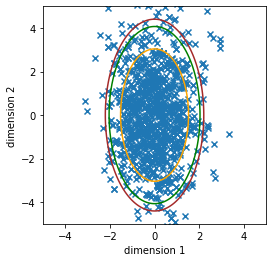

In [0]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.025], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')

# for scatter plot 
idx = random.choices(list(range(len(x_holder))), k = 1000) 
x1 = [x_holder[i][0] for i in idx]
x2 = [x_holder[i][1] for i in idx]
plt.scatter(x1, x2, marker = 'x')

plt.show() 

## Uniform proposal distribution 

In [0]:
total_steps = 10000 
epsilion = np.random.normal(0,1)
print('epsilion: ', epsilion)
var = multivariate_normal(mu, sigma)

# random initialization of c0 - strictly positive definite 
def sample(x): 
  y1 = np.random.uniform(x[0] - epsilion, x[0] + epsilion)
  y2 = np.random.uniform(x[1] - epsilion, x[1] + epsilion)
  return np.array([y1, y2])

# random initialization of x0 - initial state 
x = np.random.rand(2)


# burn in 
for t in range(1000): 
  # sample based on cov and mean - last x 
  y = sample(x)                                                                 # Normal proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y 

print('done burn in') 

# actual testing 
x_holder = [] 
for t in range(total_steps): 
  x_holder.append(x)
  # sample based on cov and mean - last x 
  y = sample(x)                                                                 # Normal proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y  

x_holder = np.array(x_holder)
x_holder.shape

epsilion:  -2.1005826044507363
done burn in


(10000, 2)

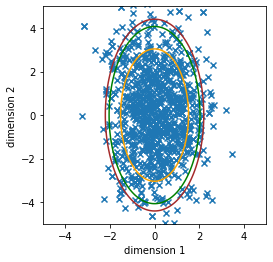

In [0]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.025], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')

# for scatter plot 
idx = random.choices(list(range(len(x_holder))), k = 1000) 
x1 = [x_holder[i][0] for i in idx]
x2 = [x_holder[i][1] for i in idx]
plt.scatter(x1, x2, marker = 'x')
plt.show() 

## Beta proposal distribution

In [0]:
total_steps = 10000 
epsilion = np.random.normal(0,1)
print('epsilion: ', epsilion)
var = multivariate_normal(mu, sigma)

a = 4
b = 4

# random initialization of c0 - strictly positive definite 
def sample(x, a, b): 
  [y1, y2] = np.random.beta(a, b, 2)
  y1 = x[0] + y1 - a / (a+b)
  y2 = x[1] + y2 - a / (a+b)
  return np.array([y1, y2])

# random initialization of x0 - initial state 
x = np.random.rand(2)


# burn in 
for t in range(1000): 
  # sample based on cov and mean - last x 
  y = sample(x, a, b)                                                           # Beta proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y 

print('done burn in') 

# actual testing 
x_holder = [] 
for t in range(total_steps): 
  x_holder.append(x)
  # sample based on cov and mean - last x 
  y = sample(x, a, b)                                                           # Beta proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y  

x_holder = np.array(x_holder)
x_holder.shape

epsilion:  0.8046125914209946
done burn in


(10000, 2)

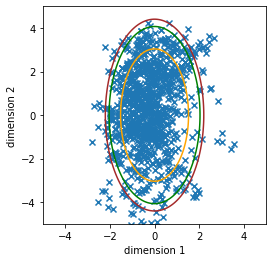

In [0]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.025], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')

# for scatter plot 
idx = random.choices(list(range(len(x_holder))), k = 1000) 
x1 = [x_holder[i][0] for i in idx]
x2 = [x_holder[i][1] for i in idx]
plt.scatter(x1, x2, marker = 'x')
plt.show() 

#2. Correlated Gaussian

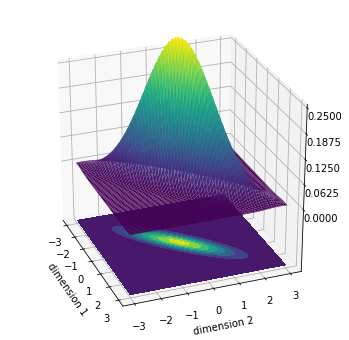

In [0]:
# Our 2-dimensional distribution will be over variables X and Y
N = 200
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
sigma = np.array([[1., 0.9], [0.9, 1]]) 

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(sigma)
    Sigma_inv = np.linalg.inv(sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.1)
ax.set_zticks(np.linspace(0,0.25,5))
ax.view_init(27, -21)
ax.set(xlabel='dimension 1', ylabel='dimension 2')
plt.show()

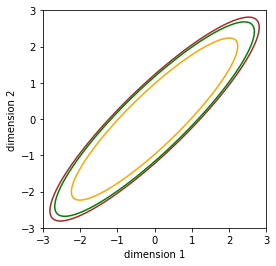

In [0]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.03], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')
plt.show() 

## Gaussian proposal distribution

In [0]:
total_steps = 10000 
epsilion1 = np.random.normal(0,1)
epsilion2 = np.random.normal(0,1)
var = multivariate_normal(mu, sigma)

# random initialization of c0 - strictly positive definite 
cov = np.diag([epsilion1, epsilion2])

# random initialization of x0 - initial state 
x = np.random.rand(2)


# burn in 
for t in range(1000): 
  # sample based on cov and mean - last x 
  y = np.random.multivariate_normal(x, cov)                                     # Normal proposal distribution 
  # acceptance pr 
  y_pdf = multivariate_gaussian(y, mu, sigma)
  x_pdf = multivariate_gaussian(x, mu, sigma)
  accept_pr = 1 if 1 <= (y_pdf / x_pdf) else (y_pdf / x_pdf)
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y 

print('done burn in') 

# actual testing 
x_holder = [] 
for t in range(total_steps): 
  x_holder.append(x)
  # sample based on cov and mean - last x 
  y = np.random.multivariate_normal(x, cov)                                     # Normal proposal distribution 
  # acceptance pr 
  y_pdf = multivariate_gaussian(y, mu, sigma)
  x_pdf = multivariate_gaussian(x, mu, sigma)
  accept_pr = 1 if 1 <= (y_pdf / x_pdf) else (y_pdf / x_pdf)
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y  

x_holder = np.array(x_holder)
x_holder.shape

done burn in


(10000, 2)

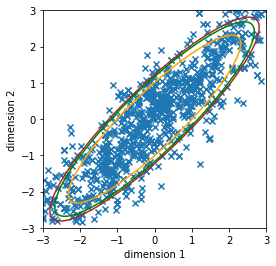

In [0]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.025], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')

# for scatter plot 
idx = random.choices(list(range(len(x_holder))), k = 1000) 
x1 = [x_holder[i][0] for i in idx]
x2 = [x_holder[i][1] for i in idx]
plt.scatter(x1, x2, marker = 'x')
plt.show() 

## Uniform proposal distribution 

In [0]:
total_steps = 10000 
epsilion = np.random.normal(0,1)
print('epsilion: ', epsilion)
var = multivariate_normal(mu, sigma)

# random initialization of c0 - strictly positive definite 
def sample(x): 
  y1 = np.random.uniform(x[0] - epsilion, x[0] + epsilion)
  y2 = np.random.uniform(x[1] - epsilion, x[1] + epsilion)
  return np.array([y1, y2])

# random initialization of x0 - initial state 
x = np.random.rand(2)


# burn in 
for t in range(1000): 
  # sample based on cov and mean - last x 
  y = sample(x)                                                                 # Normal proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y 

print('done burn in') 

# actual testing 
x_holder = [] 
for t in range(total_steps): 
  x_holder.append(x)
  # sample based on cov and mean - last x 
  y = sample(x)                                                                 # Normal proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y  

x_holder = np.array(x_holder)
x_holder.shape

epsilion:  -0.3518152851478542
done burn in


(10000, 2)

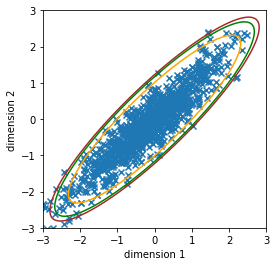

In [0]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.025], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')

# for scatter plot 
idx = random.choices(list(range(len(x_holder))), k = 1000) 
x1 = [x_holder[i][0] for i in idx]
x2 = [x_holder[i][1] for i in idx]
plt.scatter(x1, x2, marker = 'x')
plt.show() 

## Beta proposal distribution 

In [0]:
total_steps = 10000 
epsilion = np.random.normal(0,1)
print('epsilion: ', epsilion)
var = multivariate_normal(mu, sigma)

a = 4
b = 4

# random initialization of c0 - strictly positive definite 
def sample(x, a, b): 
  [y1, y2] = np.random.beta(a, b, 2)
  y1 = x[0] + y1 - a / (a+b)
  y2 = x[1] + y2 - a / (a+b)
  return np.array([y1, y2])

# random initialization of x0 - initial state 
x = np.random.rand(2)


# burn in 
for t in range(1000): 
  # sample based on cov and mean - last x 
  y = sample(x, a, b)                                                           # Beta proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y 

print('done burn in') 

# actual testing 
x_holder = [] 
for t in range(total_steps): 
  x_holder.append(x)
  # sample based on cov and mean - last x 
  y = sample(x, a, b)                                                           # Beta proposal distribution 
  # acceptance pr 
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y  

x_holder = np.array(x_holder)
x_holder.shape

epsilion:  -0.6720419270444827
done burn in


(10000, 2)

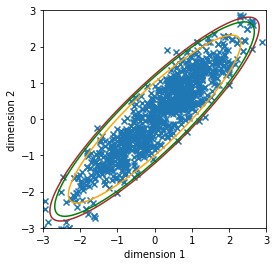

In [0]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.025], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')

# for scatter plot 
idx = random.choices(list(range(len(x_holder))), k = 1000) 
x1 = [x_holder[i][0] for i in idx]
x2 = [x_holder[i][1] for i in idx]
plt.scatter(x1, x2, marker = 'x')
plt.show() 

#3. Moderate Banana 

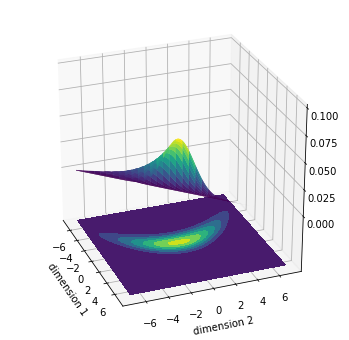

In [435]:
b = 0.1
d = 2 
mu = [0] * d 
a = [10] + [1] * (d-1)
sigma = np.diag(a)

var = multivariate_normal(mean, sigma)
X = np.linspace(-7,7,100)
Y = np.linspace(-7,7,100)
Z = np.zeros((len(X), len(Y)))

for i in range(len(X)): 
  x1 = X[i]
  for j in range(len(Y)): 
    x2 = Y[j] + b * (x1 ** 2) 
    Z[i,j] = var.pdf([x1,x2])

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.plot_surface(Y, X, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(Y, X, Z, zdir='z', offset=-0.05, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.05,0.1)
ax.set_zticks(np.linspace(0,0.1,5))
ax.view_init(27, -21)
ax.set(xlabel='dimension 1', ylabel='dimension 2')
plt.show()

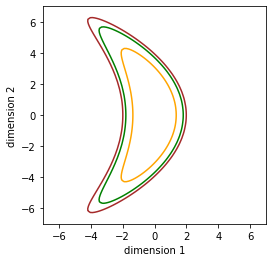

In [436]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.02], colors = ['brown','g','orange'])

ax.set(xlabel='dimension 1', ylabel='dimension 2')

plt.show() 

## Gaussian proposal distribution

In [437]:
total_steps = 10000 
epsilion1 = np.random.normal(0,1)
epsilion2 = np.random.normal(0,1)
var = multivariate_normal(mu, sigma)

# random initialization of c0 - strictly positive definite 
cov = np.diag([epsilion1, epsilion2])

# random initialization of x0 - initial state 
x = np.random.rand(2)


# burn in 
for t in range(1000): 
  # sample based on cov and mean - last x 
  y = np.random.multivariate_normal(x, cov)                                     # Normal proposal distribution 
  # acceptance pr 
  twisted_y = [y[0], y[1] + b * (y[0] ** 2)]
  twisted_x = [x[0], x[1] + b * (x[0] ** 2)]
  accept_pr = 1 if 1 <= (var.pdf(twisted_y) / var.pdf(twisted_x)) else (var.pdf(twisted_y) / var.pdf(twisted_x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y 

print('done burn in') 

# actual testing 
twisted_x_holder = [] 
x_holder = [] 

for t in range(total_steps): 
  # sample based on cov and mean - last x 
  y = np.random.multivariate_normal(x, cov)                                     # Normal proposal distribution 
  # acceptance pr 
  twisted_y = [y[0], y[1] + b * (y[0] ** 2)]
  twisted_x = [x[0], x[1] + b * (x[0] ** 2)]
  accept_pr = 1 if 1 <= (var.pdf(y) / var.pdf(x)) else (var.pdf(y) / var.pdf(x))
  # accept or reject y 
  if random.uniform(0, 1) <= accept_pr: # accept 
    x = y  
  x_holder.append(x)
  twisted_x_holder.append(twisted_x)

x_holder = np.array(x_holder)
twisted_x_holder = np.array(twisted_x_holder)
x_holder.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


done burn in


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: covariance is not positive-semidefinite.


(10000, 2)

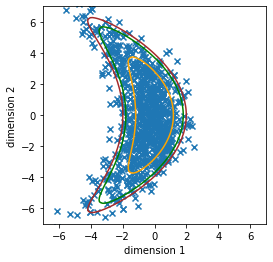

In [441]:
# 2D
fig = plt.figure(figsize=(4,4))
ax = fig.gca()  
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
cs = ax.contour(X, Y, Z, levels = [0.007, 0.01, 0.025], colors = ['brown','g','orange'])
ax.set(xlabel='dimension 1', ylabel='dimension 2')

# for scatter plot 
idx = random.choices(list(range(len(x_holder))), k = 1000) 
x1 = [try_holder[i][0] for i in idx]
x2 = [try_holder[i][1] for i in idx]
plt.scatter(x1, x2, marker = 'x')
plt.show() 